## Analyse et traitement des données

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [43]:
# Charger les données

from google.colab import files
import pandas as pd

# Téléverser un fichier manuellement
uploaded = files.upload()

# Lire le fichier (nom à ajuster selon ce qui est téléversé)
df = pd.read_csv("atp_matches_2023.csv")

# Afficher les premières lignes
df.head()

Saving atp_matches_2023.csv to atp_matches_2023 (3).csv


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2023-9900,United Cup,Hard,18,A,20230102,300,126203,3.0,NaN,...,62.0,47.0,15.0,12.0,9.0,9.0,9.0,3355.0,16.0,2375.0
1,2023-9900,United Cup,Hard,18,A,20230102,299,126207,NaN,NaN,...,12.0,8.0,3.0,4.0,1.0,3.0,19.0,2000.0,23.0,1865.0
2,2023-9900,United Cup,Hard,18,A,20230102,296,126203,3.0,NaN,...,62.0,51.0,7.0,12.0,2.0,2.0,9.0,3355.0,10.0,2905.0
3,2023-9900,United Cup,Hard,18,A,20230102,295,126207,NaN,NaN,...,41.0,26.0,12.0,9.0,6.0,9.0,19.0,2000.0,245.0,220.0
4,2023-9900,United Cup,Hard,18,A,20230102,292,126774,1.0,NaN,...,58.0,48.0,18.0,16.0,1.0,2.0,4.0,5550.0,16.0,2375.0


In [30]:
# Afficher les premières lignes
display(df.head())

print(df.columns)



,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2023-9900,United Cup,Hard,18,A,20230102,300,126203,3.0,NaN,...,62.0,47.0,15.0,12.0,9.0,9.0,9.0,3355.0,16.0,2375.0
1,2023-9900,United Cup,Hard,18,A,20230102,299,126207,NaN,NaN,...,12.0,8.0,3.0,4.0,1.0,3.0,19.0,2000.0,23.0,1865.0
2,2023-9900,United Cup,Hard,18,A,20230102,296,126203,3.0,NaN,...,62.0,51.0,7.0,12.0,2.0,2.0,9.0,3355.0,10.0,2905.0
3,2023-9900,United Cup,Hard,18,A,20230102,295,126207,NaN,NaN,...,41.0,26.0,12.0,9.0,6.0,9.0,19.0,2000.0,245.0,220.0
4,2023-9900,United Cup,Hard,18,A,20230102,292,126774,1.0,NaN,...,58.0,48.0,18.0,16.0,1.0,2.0,4.0,5550.0,16.0,2375.0


Index(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_id', 'winner_seed', 'winner_entry',
       'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age',
       'loser_id', 'loser_seed', 'loser_entry', 'loser_name', 'loser_hand',
       'loser_ht', 'loser_ioc', 'loser_age', 'score', 'best_of', 'round',
       'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon',
       'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df', 'l_svpt',
       'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced',
       'winner_rank', 'winner_rank_points', 'loser_rank', 'loser_rank_points'],
      dtype='object')


In [44]:
# Vérifier les valeurs manquantes
missing_values = df.isnull().sum()
print("Valeurs manquantes par colonne :\n", missing_values)

# Sélection des colonnes pertinentes
cols = ['tourney_date', 'surface', 'winner_id', 'loser_id', 'w_ace', 'l_ace', 'winner_rank', 'loser_rank','tourney_name','winner_ht','loser_ht','winner_hand','loser_hand']
data = df[cols]

# Convertir tourney_date en format datetime
data['tourney_date'] = pd.to_datetime(data['tourney_date'], format='%Y%m%d')

# Remplacer les valeurs manquantes des classements par une valeur élevée (non classé)
data['winner_rank'].fillna(999, inplace=True)
data['loser_rank'].fillna(999, inplace=True)


Valeurs manquantes par colonne :
 tourney_id               0
tourney_name             0
surface                 53
draw_size                0
tourney_level            0
tourney_date             0
match_num                0
winner_id                0
winner_seed           1736
winner_entry          2513
winner_name              0
winner_hand              0
winner_ht               17
winner_ioc               0
winner_age               0
loser_id                 0
loser_seed            2217
loser_entry           2291
loser_name               0
loser_hand               0
loser_ht                32
loser_ioc                0
loser_age                2
score                    0
best_of                  0
round                    0
minutes                232
w_ace                  171
w_df                   171
w_svpt                 171
w_1stIn                171
w_1stWon               171
w_2ndWon               171
w_SvGms                171
w_bpSaved              171
w_bpFaced            

<ipython-input-44-82da10cfff5e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tourney_date'] = pd.to_datetime(data['tourney_date'], format='%Y%m%d')
<ipython-input-44-82da10cfff5e>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['winner_rank'].fillna(999, inplace=True)
<

                        tourney_date      winner_id       loser_id  \
count                           2986    2986.000000    2986.000000   
mean   2023-06-02 04:03:32.190221056  145036.088078  144006.518084   
min              2023-01-02 00:00:00  100644.000000  100644.000000   
25%              2023-03-06 00:00:00  106331.000000  106233.000000   
50%              2023-05-29 00:00:00  126205.000000  126205.000000   
75%              2023-08-21 00:00:00  200325.000000  200318.000000   
max              2023-11-27 00:00:00  212051.000000  212044.000000   
std                              NaN   42766.699797   42450.867025   

             w_ace        l_ace  winner_rank   loser_rank    winner_ht  \
count  2815.000000  2815.000000  2986.000000  2986.000000  2969.000000   
mean      6.956306     5.415631    81.769926   123.291695   187.552375   
min       0.000000     0.000000     1.000000     1.000000    71.000000   
25%       3.000000     2.000000    17.000000    36.000000   183.000000   

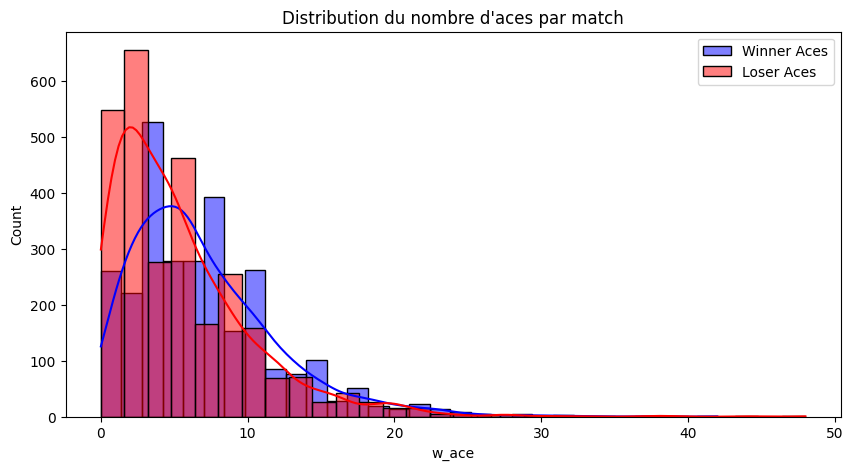

In [7]:
# Créer des statistiques descriptives
print(data.describe())

# Visualisation de la distribution des aces
plt.figure(figsize=(10,5))
sns.histplot(data['w_ace'], bins=30, kde=True, color='blue', label='Winner Aces')
sns.histplot(data['l_ace'], bins=30, kde=True, color='red', label='Loser Aces')
plt.legend()
plt.title("Distribution du nombre d'aces par match")
plt.show()

# Sauvegarde des données nettoyées pour la modélisation
data.to_csv("processed_tennis_data.csv", index=False)


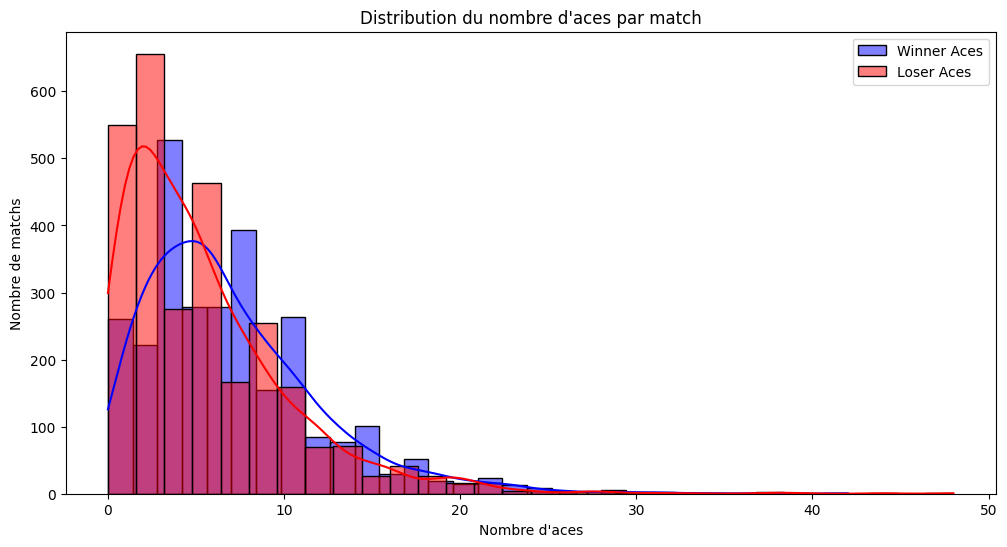

In [8]:
# Visualisation de la distribution des aces
plt.figure(figsize=(12,6))
sns.histplot(data['w_ace'], bins=30, kde=True, color='blue', label='Winner Aces')
sns.histplot(data['l_ace'], bins=30, kde=True, color='red', label='Loser Aces')
plt.legend()
plt.title("Distribution du nombre d'aces par match")
plt.xlabel("Nombre d'aces")
plt.ylabel("Nombre de matchs")
plt.show()




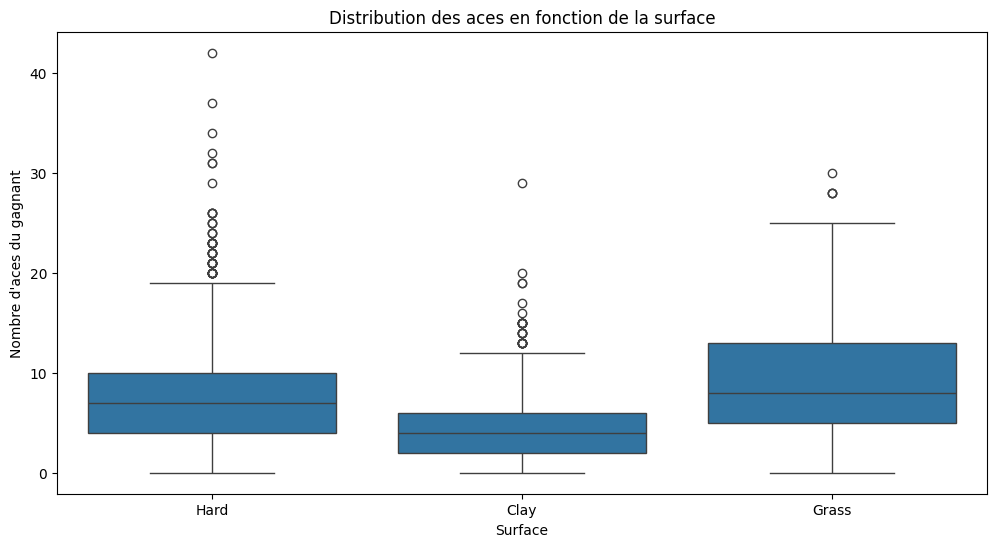

In [9]:
# Distribution des aces par surface
plt.figure(figsize=(12,6))
sns.boxplot(x='surface', y='w_ace', data=data)
plt.title("Distribution des aces en fonction de la surface")
plt.xlabel("Surface")
plt.ylabel("Nombre d'aces du gagnant")
plt.show()



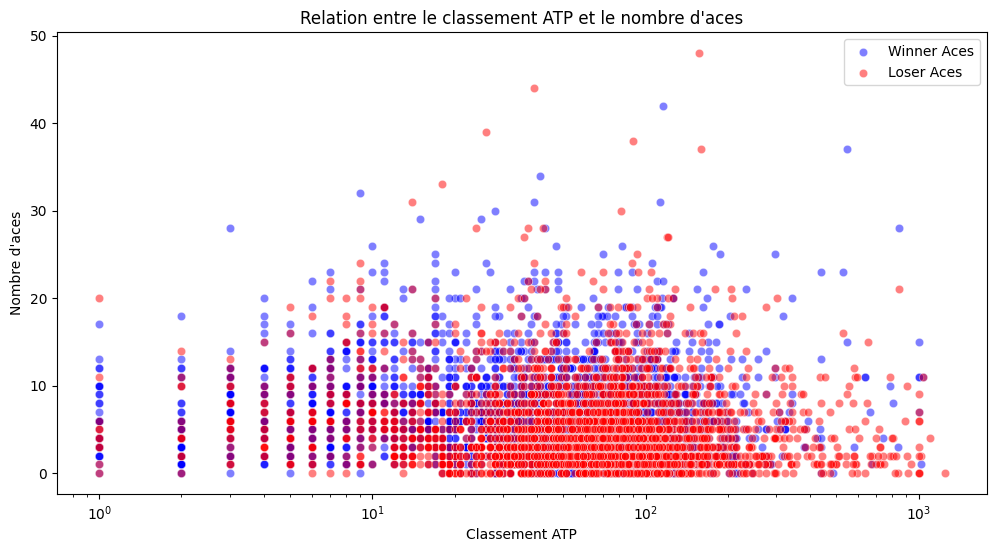

In [10]:
# Impact du classement ATP sur les aces
plt.figure(figsize=(12,6))
sns.scatterplot(x='winner_rank', y='w_ace', data=data, alpha=0.5, color='blue', label='Winner Aces')
sns.scatterplot(x='loser_rank', y='l_ace', data=data, alpha=0.5, color='red', label='Loser Aces')
plt.xscale("log")
plt.xlabel("Classement ATP")
plt.ylabel("Nombre d'aces")
plt.title("Relation entre le classement ATP et le nombre d'aces")
plt.legend()
plt.show()


<ipython-input-11-fa3cd86f4632>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='tourney_date', y='w_ace', data=data, ci=None, label='Winner Aces')
<ipython-input-11-fa3cd86f4632>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='tourney_date', y='l_ace', data=data, ci=None, label='Loser Aces')


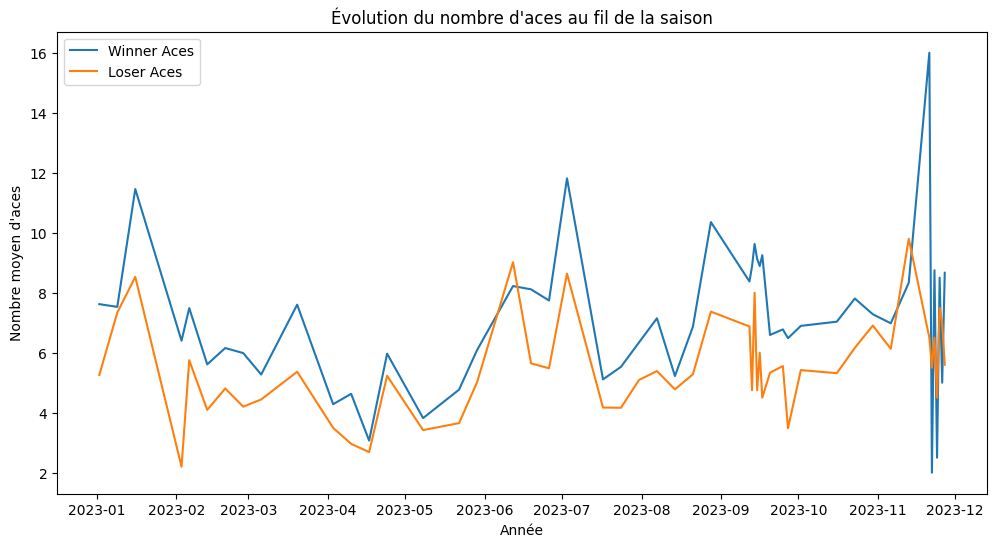

In [11]:

# Tendance des aces en fonction du temps
# data['year'] = data['tourney_date'].dt.year
plt.figure(figsize=(12,6))
sns.lineplot(x='tourney_date', y='w_ace', data=data, ci=None, label='Winner Aces')
sns.lineplot(x='tourney_date', y='l_ace', data=data, ci=None, label='Loser Aces')
plt.xlabel("Année")
plt.ylabel("Nombre moyen d'aces")
plt.title("Évolution du nombre d'aces au fil de la saison")
plt.legend()
plt.show()



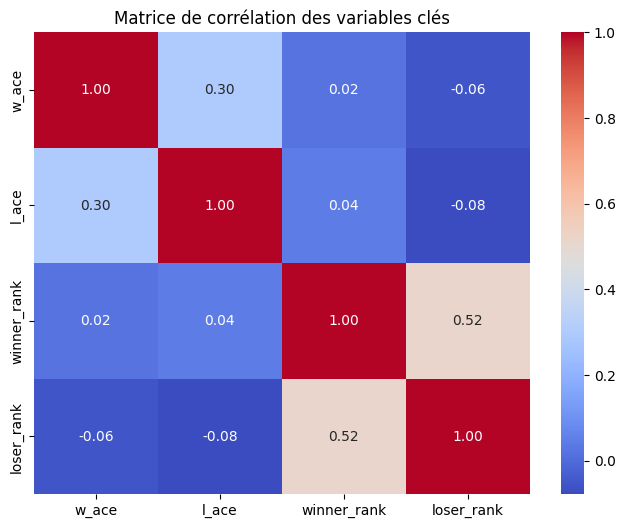

In [12]:
# Corrélations entre classement et nb aces
correlation_matrix = data[['w_ace', 'l_ace', 'winner_rank', 'loser_rank']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matrice de corrélation des variables clés")
plt.show()

In [15]:
data.columns

Index(['tourney_date', 'surface', 'winner_id', 'loser_id', 'w_ace', 'l_ace',
       'winner_rank', 'loser_rank', 'tourney_name', 'winner_ht', 'loser_ht',
       'winner_hand', 'loser_hand'],
      dtype='object')

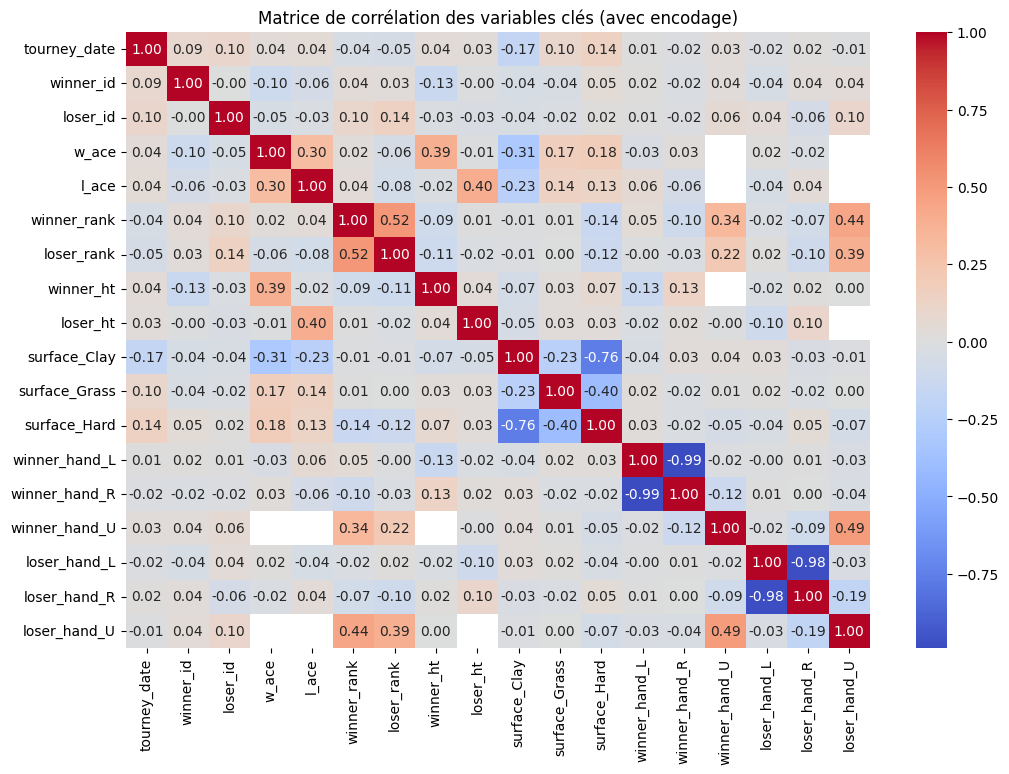

In [19]:
# Encoder les variables catégorielles en one-hot
data_corr = data.drop(columns=['tourney_name'])
data_encoded = pd.get_dummies(data_corr, columns=['surface', 'winner_hand', 'loser_hand'])
# Calculer la matrice de corrélation
correlation_matrix = data_encoded.corr()

# Afficher la heatmap
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matrice de corrélation des variables clés (avec encodage)")
plt.show()



Liste des colonnes :

'tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_id', 'winner_seed', 'winner_entry',
       'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age',
       'loser_id', 'loser_seed', 'loser_entry', 'loser_name', 'loser_hand',
       'loser_ht', 'loser_ioc', 'loser_age', 'score', 'best_of', 'round',
       'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon',
       'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df', 'l_svpt',
       'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced',
       'winner_rank', 'winner_rank_points', 'loser_rank', 'loser_rank_points'],
      dtype='object'

In [17]:
# Nombre de matchs récents à prendre en compte
last_n_matches = 10

# Fonction pour calculer les stats des joueurs sur les derniers matchs
def compute_recent_stats(player_id, matches, col_prefix):
#    recent_matches = matches[matches['player_id'] == player_id].sort_values(by='tourney_date', ascending=False).head(last_n_matches)
    recent_matches = matches[
    (matches['winner_id'] == player_id) | (matches['loser_id'] == player_id)
    ].sort_values(by='tourney_date', ascending=False).head(last_n_matches)

    return {
        f'avg_aces_{col_prefix}': recent_matches['aces'].mean() if not recent_matches.empty else 0,
        f'std_aces_{col_prefix}': recent_matches['aces'].std() if not recent_matches.empty else 0,
        f'avg_rank_{col_prefix}': recent_matches['rank'].mean() if not recent_matches.empty else 999
    }



In [ ]:
# Création d'un dataframe pour stocker les statistiques récentes
player_stats = []
for player_id in pd.concat([data['winner_id'], data['loser_id']]).unique():
    winner_matches = data[data['winner_id'] == player_id][['tourney_date', 'w_ace', 'winner_rank']]
    winner_matches = winner_matches.rename(columns={'w_ace': 'aces', 'winner_rank': 'rank'})
    loser_matches = data[data['loser_id'] == player_id][['tourney_date', 'l_ace', 'loser_rank']]
    loser_matches = loser_matches.rename(columns={'l_ace': 'aces', 'loser_rank': 'rank'})

    all_matches = pd.concat([winner_matches, loser_matches])
    all_matches['aces'] = all_matches['aces'].fillna(all_matches['aces'].mean())
    player_id = int(player_id)
#    print(f"Player ID: {player_id}, Type: {type(player_id)}")
#    print(f"Nombre de matchs trouvés: {len(all_matches)}")
#    print(f"Colonnes disponibles: {all_matches.columns}")
#    print(f"Types des colonnes:\n{all_matches.dtypes}")
#    print(all_matches.head())  # Vérifie les premières lignes
    all_matches['player_id'] = player_id  # Ajoute explicitement player_id
    stats = compute_recent_stats(player_id, all_matches, 'recent')
    stats['player_id'] = player_id
    player_stats.append(stats)

player_stats_df = pd.DataFrame(player_stats)

# Fusionner avec les données principales
data = data.merge(player_stats_df, left_on='winner_id', right_on='player_id', how='left')
data = data.merge(player_stats_df, left_on='loser_id', right_on='player_id', how='left', suffixes=('_winner', '_loser'))
data.drop(columns=['player_id_winner', 'player_id_loser'], inplace=True)

# Création de la variable cible Over/Under sur la médiane des aces
threshold = data[['w_ace', 'l_ace']].median().mean()
data['over_under'] = (data['w_ace'] + data['l_ace'] > threshold).astype(int)


KeyError: 'winner_id'

In [18]:
# Nombre de matchs récents à prendre en compte
last_n_matches = 10

# Fonction pour calculer les stats des joueurs sur les derniers matchs
def compute_recent_stats(player_id, matches):
    # Sélectionner les 10 derniers matchs du joueur
    recent_matches = matches[matches['player_id'] == player_id].sort_values(by='tourney_date', ascending=False).head(last_n_matches)

    # Calcul des statistiques
    avg_aces = recent_matches['aces'].mean() if not recent_matches.empty else 0
    std_aces = recent_matches['aces'].std() if not recent_matches.empty else 0
    avg_rank = recent_matches['rank'].mean() if not recent_matches.empty else 999

    return {
        'avg_aces': avg_aces,
        'std_aces': std_aces,
        'avg_rank': avg_rank
    }

# Créer un DataFrame pour stocker les statistiques récentes
player_stats = []
for player_id in pd.concat([data['winner_id'], data['loser_id']]).unique():
    # Sélectionner les matchs gagnés et perdus par le joueur
    winner_matches = data[data['winner_id'] == player_id][['tourney_date', 'w_ace', 'winner_rank']]
    winner_matches = winner_matches.rename(columns={'w_ace': 'aces', 'winner_rank': 'rank'})
    loser_matches = data[data['loser_id'] == player_id][['tourney_date', 'l_ace', 'loser_rank']]
    loser_matches = loser_matches.rename(columns={'l_ace': 'aces', 'loser_rank': 'rank'})

    # Combiner les matchs gagnés et perdus
    all_matches = pd.concat([winner_matches, loser_matches])

    # Ajouter un identifiant de joueur dans les matchs pour filtrer
    all_matches['player_id'] = player_id

    # Calculer les statistiques récentes
    stats = compute_recent_stats(player_id, all_matches)
    stats['player_id'] = player_id
    player_stats.append(stats)

# Créer un DataFrame avec les statistiques
player_stats_df = pd.DataFrame(player_stats)

# Fusionner avec les données principales pour obtenir les stats des gagnants et des perdants
data_winner = data.merge(player_stats_df, left_on='winner_id', right_on='player_id', how='left')
data_loser = data.merge(player_stats_df, left_on='loser_id', right_on='player_id', how='left', suffixes=('_winner', '_loser'))

# Afficher un aperçu du DataFrame final
print(data_winner.head())
print(data_loser.head())


  tourney_date surface  winner_id  loser_id  w_ace  l_ace  winner_rank  \
0   2023-01-02    Hard     126203    126610   15.0    7.0          9.0   
1   2023-01-02    Hard     126207    207518    3.0    0.0         19.0   
2   2023-01-02    Hard     126203    128034   11.0   17.0          9.0   
3   2023-01-02    Hard     126207    200390    5.0    3.0         19.0   
4   2023-01-02    Hard     126774    126610    9.0    7.0          4.0   

   loser_rank tourney_name  winner_ht  loser_ht winner_hand loser_hand  \
0        16.0   United Cup      196.0     196.0           R          R   
1        23.0   United Cup      188.0     185.0           R          R   
2        10.0   United Cup      196.0     196.0           R          R   
3       245.0   United Cup      188.0     183.0           R          R   
4        16.0   United Cup      193.0     196.0           R          R   

    avg_aces  std_aces  avg_rank  player_id  
0  12.666667  4.690416       9.2     126203  
1   6.500000  5.06

# Modèle ML

In [46]:
data

,tourney_date,surface,winner_id,loser_id,w_ace,l_ace,winner_rank,loser_rank,tourney_name,winner_ht,loser_ht,winner_hand,loser_hand
0,2023-01-02,Hard,126203,126610,15.0,7.0,9.0,16.0,United Cup,196.0,196.0,R,R
1,2023-01-02,Hard,126207,207518,3.0,0.0,19.0,23.0,United Cup,188.0,185.0,R,R
2,2023-01-02,Hard,126203,128034,11.0,17.0,9.0,10.0,United Cup,196.0,196.0,R,R
3,2023-01-02,Hard,126207,200390,5.0,3.0,19.0,245.0,United Cup,188.0,183.0,R,R
4,2023-01-02,Hard,126774,126610,9.0,7.0,4.0,16.0,United Cup,193.0,196.0,R,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2847,2023-02-03,Clay,111815,200711,5.0,2.0,11.0,253.0,Davis Cup QLS R1: GBR vs COL,188.0,183.0,L,R
2849,2023-02-03,Hard,100644,104527,8.0,0.0,14.0,135.0,Davis Cup QLS R1: GER vs SUI,198.0,183.0,R,R
2850,2023-02-03,Hard,144817,100644,6.0,7.0,53.0,14.0,Davis Cup QLS R1: GER vs SUI,196.0,198.0,L,R
2883,2023-09-16,Hard,126774,127760,10.0,5.0,5.0,149.0,Davis Cup WG1 R1: GRE vs SVK,193.0,193.0,R,R


In [47]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

data = data.dropna(subset=["w_ace"])

features = ["winner_rank", "loser_rank", "winner_ht", "loser_ht", "surface"]
target = "w_ace"  # Nombre d'aces du gagnant

# Encodage de la variable "surface" (one-hot encoding)
data = pd.get_dummies(data, columns=["surface"], drop_first=True)

features = ["winner_rank", "loser_rank", "winner_ht", "loser_ht", "surface_Grass", "surface_Hard"]
X = data[features]
y = data[target]

# Division des données en 80% entraînement / 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Calcul des erreurs
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")


Mean Absolute Error: 3.42
Root Mean Squared Error: 4.59


In [51]:
new_match = pd.DataFrame({
    "winner_rank": [5],
    "loser_rank": [20],
    "winner_ht": [190],
    "loser_ht": [185],
    "surface_Grass": [0],
    "surface_Hard": [1]
    # Exemple pour un match sur dur
})

predicted_aces = model.predict(new_match)
print(f"Nombre d'aces prédit : {predicted_aces[0]:.2f}")


Nombre d'aces prédit : 6.25
